In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
!pip install keras

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 78, in main
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  Fil

In [5]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devv9dsharma/beach-waste-detection-dataset")

print("Path to dataset files:", path)

100%|██████████| 66.6M/66.6M [00:00<00:00, 200MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/devv9dsharma/beach-waste-detection-dataset/versions/1


In [10]:
base_path = "/root/.cache/kagglehub/datasets/devv9dsharma/beach-waste-detection-dataset/versions/1/Beach_Waste_Dataset"
train_dir = os.path.join(sub_path, "train")
val_dir = os.path.join(sub_path, "val")

In [11]:
img_size = (224, 224)
batch_size = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
).flow_from_directory(
    train_dir,
    target_size=img_size,
    class_mode='binary',
    batch_size=batch_size
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_dir,
    target_size=img_size,
    class_mode='binary',
    batch_size=batch_size
)

Found 183 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


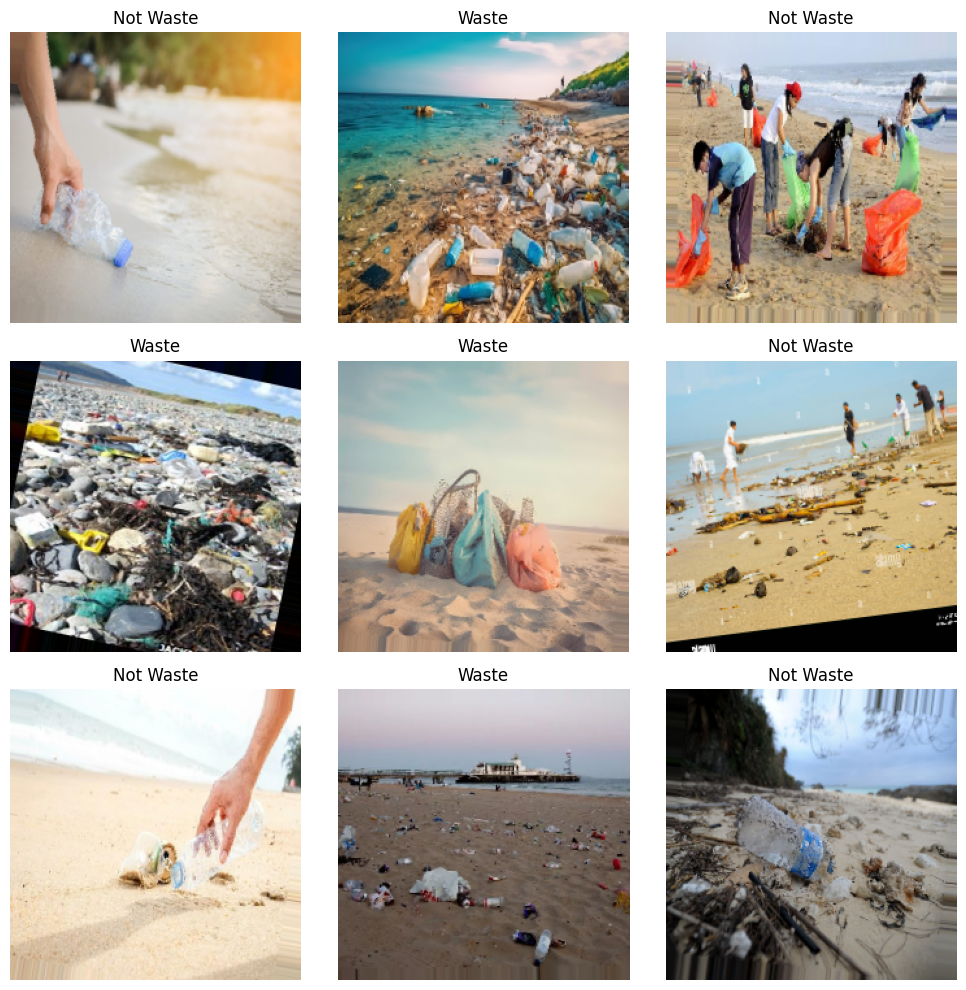

In [13]:
# Get a new batch of images and labels
images, labels = next(train_gen)

# Display 9 new samples
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Waste" if labels[i] == 1 else "Not Waste")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Ready for thre model now

In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# load MobileNetV2 without the top layer
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# freeze base model
base_model.trainable = False

# ddd custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Binary output

#full model
model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4651 - loss: 0.8050

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4658 - loss: 0.8042 - val_accuracy: 0.4889 - val_loss: 0.7971
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5918 - loss: 0.6798 - val_accuracy: 0.5333 - val_loss: 0.7653
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6353 - loss: 0.6483 - val_accuracy: 0.4889 - val_loss: 0.7397
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7271 - loss: 0.5968 - val_accuracy: 0.5556 - val_loss: 0.7211
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7336 - loss: 0.5758 - val_accuracy: 0.5778 - val_loss: 0.7083
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7384 - loss: 0.5615 - val_accuracy: 0.5778 - val_loss: 0.6961
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7908 - loss: 0.5021 - val_accuracy: 0.5556 - val_loss: 0.6888
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8215 - loss: 0.5123 - val_accuracy: 0.5556 - val_loss: 0.6850
Epoch 9/10
6/6 ━━━━━━━━━━

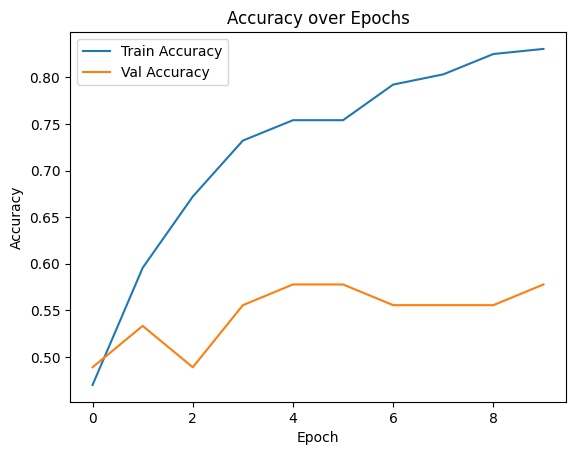

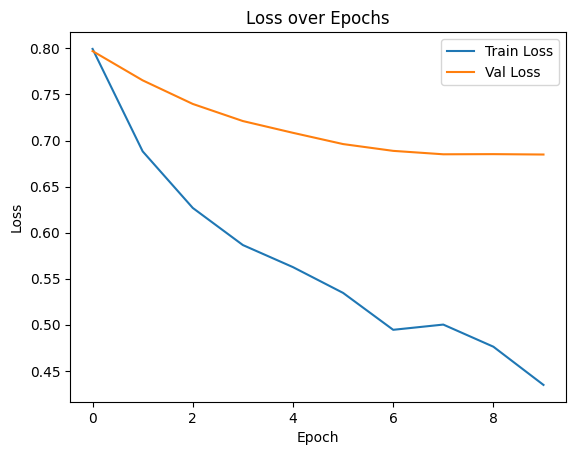

In [16]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
              precision    recall  f1-score   support

   Not Waste       0.44      0.42      0.43        19
       Waste       0.59      0.62      0.60        26

    accuracy                           0.53        45
   macro avg       0.52      0.52      0.52        45
weighted avg       0.53      0.53      0.53        45



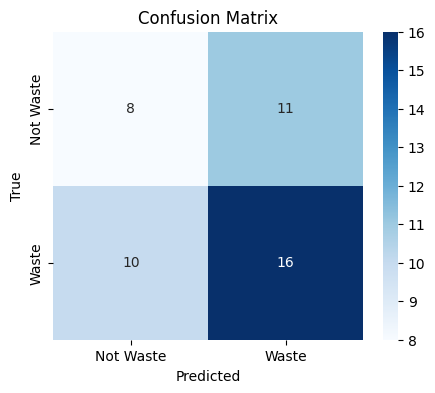

In [18]:
# Reset the generator and predict
val_gen.reset()
y_pred_probs = model.predict(val_gen)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Get true labels
y_true = val_gen.classes

# Classification report
print(classification_report(y_true, y_pred, target_names=['Not Waste', 'Waste']))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Waste', 'Waste'], yticklabels=['Not Waste', 'Waste'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## The model is having a hard time correctly identifying clean images.
The model does a good job at: detecting waste.
The model struggles: detecting clean images.

In [21]:
import cv2
from IPython.display import display, clear_output
import ipywidgets as widgets

not_waste_dir = os.path.join(val_dir, 'not_waste')
waste_dir = os.path.join(val_dir, 'waste')

image_files = sorted(os.listdir(not_waste_dir))

# Function to process image
def review_image(index):
    if index >= len(image_files):
        print("✅ Done reviewing all images.")
        return

    img_name = image_files[index]
    img_path = os.path.join(not_waste_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(f"Image {index+1}/{len(image_files)}: {img_name}")
    plt.axis('off')
    plt.show()

    # Buttons
    keep_btn = widgets.Button(description="Keep as Not Waste ✅")
    move_btn = widgets.Button(description="Move to Waste ❌")

    def on_keep_clicked(b):
        clear_output(wait=True)
        print(f"✅ Kept {img_name} in 'not_waste'")
        review_image(index + 1)

    def on_move_clicked(b):
        new_path = os.path.join(waste_dir, img_name)
        os.rename(img_path, new_path)
        clear_output(wait=True)
        print(f"❌ Moved {img_name} to 'waste'")
        review_image(index + 1)

    keep_btn.on_click(on_keep_clicked)
    move_btn.on_click(on_move_clicked)

    display(widgets.HBox([keep_btn, move_btn]))

# Start reviewing from the first image
review_image(0)


✅ Kept 000098.jpg in 'not_waste'
✅ Done reviewing all images.


In [22]:
import cv2
from IPython.display import display, clear_output
import ipywidgets as widgets

# Paths
not_waste_dir = os.path.join(val_dir, 'not_waste')
waste_dir = os.path.join(val_dir, 'waste')
log_file = 'review_log.csv'

# Load or create log
if os.path.exists(log_file):
    log_df = pd.read_csv(log_file)
    reviewed = set(log_df['filename'])
else:
    log_df = pd.DataFrame(columns=['filename', 'decision'])
    reviewed = set()

# Get unreviewed images only
image_files = sorted([
    f for f in os.listdir(not_waste_dir)
    if f.lower().endswith(('.jpg', '.jpeg', '.png')) and f not in reviewed
])

# Function to save log
def save_log(filename, decision):
    global log_df
    log_df = pd.concat([log_df, pd.DataFrame([{'filename': filename, 'decision': decision}])], ignore_index=True)
    log_df.to_csv(log_file, index=False)

# Review function
def review_image(index):
    if index >= len(image_files):
        print("🎉 Done! All unreviewed images completed.")
        return

    img_name = image_files[index]
    img_path = os.path.join(not_waste_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(f"{index+1}/{len(image_files)} — {img_name}")
    plt.axis('off')
    plt.show()

    # Buttons
    keep_btn = widgets.Button(description="✅ Keep")
    move_btn = widgets.Button(description="❌ Move to Waste")

    def on_keep_clicked(b):
        clear_output(wait=True)
        print(f"✅ Kept: {img_name}")
        save_log(img_name, 'keep')
        review_image(index + 1)

    def on_move_clicked(b):
        new_path = os.path.join(waste_dir, img_name)
        os.rename(img_path, new_path)
        clear_output(wait=True)
        print(f"❌ Moved: {img_name}")
        save_log(img_name, 'moved')
        review_image(index + 1)

    keep_btn.on_click(on_keep_clicked)
    move_btn.on_click(on_move_clicked)
    display(widgets.HBox([keep_btn, move_btn]))

# Start reviewing
review_image(0)

✅ Kept: 000098.jpg
🎉 Done! All unreviewed images completed.


In [23]:
log_df = pd.read_csv("review_log.csv")
print("You already reviewed:", len(log_df), "images")
log_df.tail()

You already reviewed: 3 images


,filename,decision
0,000091.jpg,keep
1,000093.jpg,keep
2,000098.jpg,keep


In [24]:
not_waste_files = [f for f in os.listdir(not_waste_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
print("Current not_waste folder has:", len(not_waste_files), "images")

Current not_waste folder has: 3 images


In [25]:
reviewed_files = set(log_df['filename'])
unreviewed = [f for f in not_waste_files if f not in reviewed_files]

print("Still left to review:", len(unreviewed), "images")

Still left to review: 0 images


In [26]:
print("🧾 Current contents:")
print("val/not_waste →", len(os.listdir(os.path.join(val_dir, 'not_waste'))), "images")
print("val/waste     →", len(os.listdir(os.path.join(val_dir, 'waste'))), "images")

🧾 Current contents:
val/not_waste → 3 images
val/waste     → 38 images


In [27]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets

# === Updated for TRAINING set ===
not_waste_dir = os.path.join(train_dir, 'not_waste')
waste_dir = os.path.join(train_dir, 'waste')
log_file = 'train_review_log.csv'  # separate log for training set

# Load or create log
if os.path.exists(log_file):
    log_df = pd.read_csv(log_file)
    reviewed = set(log_df['filename'])
else:
    log_df = pd.DataFrame(columns=['filename', 'decision'])
    reviewed = set()

# Get unreviewed images only
image_files = sorted([
    f for f in os.listdir(not_waste_dir)
    if f.lower().endswith(('.jpg', '.jpeg', '.png')) and f not in reviewed
])

# Function to save log
def save_log(filename, decision):
    global log_df
    log_df = pd.concat([log_df, pd.DataFrame([{'filename': filename, 'decision': decision}])], ignore_index=True)
    log_df.to_csv(log_file, index=False)

# Review function
def review_image(index):
    if index >= len(image_files):
        print("🎉 Done! All unreviewed training images completed.")
        return

    img_name = image_files[index]
    img_path = os.path.join(not_waste_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(f"{index+1}/{len(image_files)} — {img_name}")
    plt.axis('off')
    plt.show()

    # Buttons
    keep_btn = widgets.Button(description="✅ Keep")
    move_btn = widgets.Button(description="❌ Move to Waste")

    def on_keep_clicked(b):
        clear_output(wait=True)
        print(f"✅ Kept: {img_name}")
        save_log(img_name, 'keep')
        review_image(index + 1)

    def on_move_clicked(b):
        new_path = os.path.join(waste_dir, img_name)
        os.rename(img_path, new_path)
        clear_output(wait=True)
        print(f"❌ Moved: {img_name}")
        save_log(img_name, 'moved')
        review_image(index + 1)

    keep_btn.on_click(on_keep_clicked)
    move_btn.on_click(on_move_clicked)
    display(widgets.HBox([keep_btn, move_btn]))

# Start reviewing
review_image(0)

✅ Kept: 000097.jpg
🎉 Done! All unreviewed training images completed.


In [29]:
# Function to count images in each class
def count_images(folder_path):
    waste_count = len([
        f for f in os.listdir(os.path.join(folder_path, 'waste'))
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])
    not_waste_count = len([
        f for f in os.listdir(os.path.join(folder_path, 'not_waste'))
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])
    return waste_count, not_waste_count

# Count for training set
train_waste, train_not_waste = count_images(train_dir)
print(f"Training Set:\n  Waste: {train_waste}\n  Not Waste: {train_not_waste}")

# Count for validation set
val_waste, val_not_waste = count_images(val_dir)
print(f"\nValidation Set:\n  Waste: {val_waste}\n  Not Waste: {val_not_waste}")

Training Set:
  Waste: 119
  Not Waste: 24

Validation Set:
  Waste: 38
  Not Waste: 3


# My new plan is to merge this other beach waste data set i found on kaggle with thisa one, then add regularization, a dropout, and more layers.
